In [2]:
import pandas as pd 
import numpy as np

In [3]:
base = pd.read_csv('dataset_SCL.csv')
base.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8144\3935152703.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  base = pd.read_csv('dataset_SCL.csv')


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1.0,1.0,2017.0,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2.0,1.0,2017.0,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3.0,1.0,2017.0,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4.0,1.0,2017.0,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5.0,1.0,2017.0,Jueves,I,American Airlines,Santiago,Miami


Analisis Exploratorio 

In [102]:
base.shape

(68206, 18)

In [17]:
anno=base.groupby('AÑO').size()
anno

AÑO
2017.0    68165
2018.0        2
dtype: int64

Para el año 2017 se realizaron un total de 68.165 vuelos y solo para el año 2018 se realizaron 2 vuelos

In [19]:
anno_mes=base.groupby(['AÑO', 'MES']).size()
anno_mes=anno_mes.reset_index()
anno_mes=pd.pivot_table(anno_mes, columns="AÑO", index="MES", values=0)
anno_mes 

AÑO,2017.0,2018.0
MES,,
1.0,6106.0,2.0
2.0,5561.0,NaN
3.0,5480.0,NaN
4.0,5020.0,NaN
5.0,5240.0,NaN
6.0,4981.0,NaN
7.0,5992.0,NaN
8.0,5743.0,NaN
9.0,5610.0,NaN


In [49]:
6344/68167

0.09306555958161573

Como podemos observar aproximadamente se realizan minimo 5 mil vuelos en cada uno de los meses del año 2017 y solo se realizaron dos vuelos en el mes de enero de 2018. El mes donde se presentan mas vuelos es en Diciembre (9.3%)

In [22]:
dia_semana=base.groupby('DIANOM').size()
dia_semana

DIANOM
Domingo       9796
Jueves       10237
Lunes        10130
Martes        9652
Miercoles     9721
Sabado        8352
Viernes      10279
dtype: int64

In [23]:
ciudad_origen=base.groupby('SIGLAORI').size()
ciudad_origen

SIGLAORI
Santiago    68167
dtype: int64

Todos los vuelos tienen como ciudad de origen Santiago

In [39]:
ciudad_destino=base.groupby('SIGLADES').size().sort_values(ascending=False)
ciudad_destino

SIGLADES
Buenos Aires        6335
Antofagasta         5786
Lima                5270
Calama              5146
Puerto Montt        4357
Concepcion          3993
Iquique             3747
Sao Paulo           3569
Temuco              2589
Arica               2436
La Serena           2410
Punta Arenas        2105
Ciudad de Panama    1850
Copiapo             1780
Mendoza             1625
Bogota              1604
Rio de Janeiro      1435
Montevideo          1066
Cordoba             1023
Miami               1016
Madrid               894
Balmaceda            839
Valdivia             753
Ciudad de Mexico     700
Isla de Pascua       452
Guayaquil            422
Nueva York           382
Auckland N.Z.        361
Paris                359
Atlanta              358
Dallas               357
Houston              334
Toronto              283
Roma                 259
Osorno               259
Castro (Chiloe)      235
Asuncion             232
La Paz               209
Londres              205
Sydney          

In [37]:
((6335+5786+5270+5146)/68167)*100

33.0614520222395

Se osberva que la mayor cantidad de vuelos tienen como destino Buenos Aires, Antofagasta, Lima y Calama (33% del total de los vuelos corresponde a estas 4 ciudades de destino)

In [38]:
aerolinea=base.groupby('OPERA').size().sort_values()
aerolinea

OPERA
Plus Ultra Lineas Aereas       49
Austral                        74
Lacsa                          92
Qantas Airways                195
British Airways               205
K.L.M.                        251
Alitalia                      259
Oceanair Linhas Aereas        278
United Airlines               335
Aeromexico                    351
Air France                    358
Delta Air                     358
Iberia                        362
Air Canada                    565
American Airlines             757
Gol Trans                     806
JetSmart SPA                 1095
Avianca                      1152
Latin American Wings         1674
Copa Air                     1850
Aerolineas Argentinas        1949
Sky Airline                 14298
Grupo LATAM                 40854
dtype: int64

In [48]:
print(40854/68167)
print(14298/68167)

0.5993222527029207
0.20974958557659865


se observa que la aerolinea con mas vuelos es el Grupo LATAM con un 59.9% del total de los vuelos y la aerolinea Sky Airline tiene un 20.9% del total de los vuelos

In [40]:
TIPOVUELO=base.groupby('TIPOVUELO').size().sort_values()
TIPOVUELO

TIPOVUELO
I    31201
N    36966
dtype: int64

In [45]:
36966/68167

0.5422858567928763

Vemos que el 54.2% de los vuelos son Nacionales y el 45.8% son vuelos internacionales 

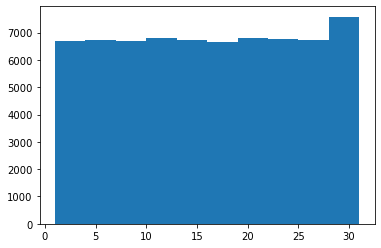

In [44]:
plt.hist(base['DIA'])
plt.show()

In [43]:
DIA=base.groupby('DIA').size()
DIA

DIA
1.0     2207
2.0     2222
3.0     2269
4.0     2215
5.0     2239
6.0     2273
7.0     2263
8.0     2211
9.0     2226
10.0    2281
11.0    2237
12.0    2281
13.0    2271
14.0    2219
15.0    2238
16.0    2267
17.0    2226
18.0    2160
19.0    2238
20.0    2289
21.0    2265
22.0    2271
23.0    2259
24.0    2230
25.0    2179
26.0    2265
27.0    2285
28.0    2230
29.0    2043
30.0    2019
31.0    1289
dtype: int64

Observamos que en todos los dias del mes se realizan minimo 2 mil vuelo y no se presentan valores atipicos en este comportamiento

Creacion Nuevas Variables

In [4]:
base.dtypes

Fecha-I       object
Vlo-I         object
Ori-I         object
Des-I         object
Emp-I         object
Fecha-O       object
Vlo-O         object
Ori-O         object
Des-O         object
Emp-O         object
DIA          float64
MES          float64
AÑO          float64
DIANOM        object
TIPOVUELO     object
OPERA         object
SIGLAORI      object
SIGLADES      object
dtype: object

In [5]:
base.dropna(inplace = True)
base["Fecha-I"]= base["Fecha-I"].str.split(",",  expand = True)

In [6]:
base["Fecha-I"]= pd.to_datetime(base["Fecha-I"], format='%Y-%m-%d %H:%M')
base["Fecha-O"]= pd.to_datetime(base["Fecha-O"], format='%Y-%m-%d %H:%M')

Creacion Variable dif_min y atraso_15

In [7]:

base["dif_min"]=(base["Fecha-O"]-base["Fecha-I"]).astype('timedelta64[m]')
base["atraso_15"] = pd.Series(np.where((base['dif_min'] >= 15) , 1, 0))


Creacion Variable Temporada Alta

In [13]:
base["temporada_alta"] =  pd.Series(np.where((base['Fecha-I'] >= "2017-12-15") & (base['Fecha-I'] <= "2017-03-03") |\
                                             (base['Fecha-I'] >= "2017-07-15") & (base['Fecha-I'] <= "2017-07-31") |\
                                             (base['Fecha-I'] >= "2017-09-11") & (base['Fecha-I'] <= "2017-09-30"), 1, 0))

Creacion Variable Periodo dia

In [16]:
base["periodo_dia"] = pd.Series(np.where((base["Fecha-I"].dt.hour.astype(int) >= 5) &  (base["Fecha-I"].dt.hour.astype(int) < 12), "mañana",
                                np.where((base["Fecha-I"].dt.hour.astype(int) >= 12) & (base["Fecha-I"].dt.hour.astype(int) < 19), "tarde","noche")))

Analisis tasa de atraso con variables 